# Изучение закономерностей, определяющих успешность игр

<b>Задачи проекта</b><br>
Используя исторические данные о продажах компьютерных игр, оценки пользователей и экспертов, жанры и платформы, выявить закономерности, определяющие успешность игры <br>

<b>Описание проекта</b><br>
Интернет-магазине «Стримчик», продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.<br>
Есть данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. 
Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.<br>
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Шаг: Откроем файл с данными и изучим общую информацию

In [1]:
# Необходимые библиотеки для исследования 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np    
from scipy import stats as st
import seaborn as sns

In [2]:
# открываем файл с данными
games = pd.read_csv('/datasets/games.csv')

In [3]:
# Получение общей информации датасета
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
# проверим количество полных дубликатов в датасете, кол-во полных дубликатов (совпадает вся строка) равно 0
games.duplicated().sum()

0

In [6]:
# проверим количество пропусков в датасете
games.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

 **Вывод по шагу 1:**
В результате обзора данных выявлено, в датасете всего 11 столбцов и 16715 строк, есть пропуски в некоторых столбцах, дубликаты отсутствуют.

## Шаг: Подготовим данные

In [7]:
# Приведем названия столбцов к нижнему регистру
games.columns = games.columns.str.lower()
games.head() # проверим результат, названия столбцов приведены к нижнему регистру

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [8]:
# Посмотрим на пропуски в столбце name, их 2. Эти же строки имеют пропусками в столбцах genre,user_score,rating
games[games['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Данные пропуски являются ошибкой ввода или повреждения данных, их лучше удалить, т.к.их всего 2. Заодно удалятся и пропуски столбца 'genre'

In [9]:
games = games.dropna(subset = ['name'])

In [10]:
# Посмотрим на пропуски в столбце год выпуска (year_of_release), пропусков - 269
games[games['year_of_release'].isnull()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


Скорее всего эти пропуски из-за неполного ввода данных.
В некоторых названиях виден год игры, можно заполнить часть позиций этой информацией, а остальные пропуски удалить.

In [11]:
#удалим 269 пропуски
games = games.dropna(subset = ['year_of_release'])
#преобразуем к типу Int
games['year_of_release'] = games['year_of_release'].astype(int)

In [12]:
games.info()# Посмотрим на пропуски в столбце rating
games[games['rating'].isnull()].head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.4+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


В большинстве случаев, пропущены одновременно и рейтинг, оценка критиков и оценка пользователей. Пропусков слишком много, удалить их нельзя. Пропуски в рейтиннге могут быть или из-за ошибок данных или если игра еще не проучила свой рейтинг.

In [13]:
# заменим пропуски на Unknown
games['rating'] = games['rating'].fillna('Unknown')
games['rating'].value_counts()

Unknown    6676
E          3921
T          2905
M          1536
E10+       1393
EC            8
K-A           3
AO            1
RP            1
Name: rating, dtype: int64

4 вида рейтинга встречаются часто: Е, Т, М и Е10+, а 4 встречаются очень редко. Их можно заменить: АО,RP - заменим на Unknown; ЕС,К-А - заменим на Е;

In [14]:
games.loc[games['rating'] == 'AO', 'rating'] = 'Unknown'
games.loc[games['rating'] == 'RP', 'rating'] = 'Unknown'
games.loc[games['rating'].isin(['EC', 'K-A']), 'rating'] = 'E'
# проверка
games['rating'].value_counts()

Unknown    6678
E          3932
T          2905
M          1536
E10+       1393
Name: rating, dtype: int64

In [15]:
# Посмотрим на пропуски в столбце critic_score
games[games['critic_score'].isnull()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknown
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknown
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,Unknown
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,Unknown
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,Unknown


Пропусков слишком много,поэтому просто удалить их нельзя.

In [16]:
# заменим пропуски на значение-заглушку -1
games['critic_score'] = games['critic_score'].fillna(-1)
# преобразуем столбец к целочисленному значению
games['critic_score'] = games['critic_score'].astype('int')
games['critic_score'].value_counts()

-1     8461
 70     252
 71     248
 75     240
 80     235
       ... 
 20       3
 29       3
 21       1
 17       1
 13       1
Name: critic_score, Length: 82, dtype: int64

In [17]:
# Посмотрим на пропуски в столбце user_score
games[games['user_score'].isnull()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,NaN,Unknown
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,NaN,Unknown
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-1,NaN,Unknown
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-1,NaN,Unknown
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,-1,NaN,Unknown


Пропусков слишком много, удалить их нельзя. Также посмотрим на аббревиатуру 'tbd'.

In [18]:
games[games['user_score'] == 'tbd'].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,-1,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,-1,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,-1,tbd,E


In [19]:
# процент строк с аббревиатурой 'tbd'.
len(games[games['user_score'] == 'tbd'])/games.shape[0]

0.14449039163220628

Что такое TBD: сокращение, которое часто используется в сфере компьютерных игр расшифровывается - To Be Determined, то есть "Будет определено". То есть аббревиатура 'tbd' практически ничем не отличается от пропуска, при этом таких значений - 14,45%. Заменим указанные значения на значение-заглушку, например отрицательное число (-1). Замена значения 'tbd' на число необходима для последующего приведения типа значений столбца к числовому.

In [20]:
# games['user_score'].unique()
games['user_score'] = games['user_score'].replace('tbd', np.NaN)
# также заменим значения NaN на -1
games['user_score'] = games['user_score'].replace(np.NaN, -1)
# преобразуем данный столбец к значению float
games['user_score'] = games['user_score'].astype('float')
games['user_score'].unique()

array([ 8. , -1. ,  8.3,  8.5,  6.6,  8.4,  8.6,  7.7,  6.3,  7.4,  8.2,
        9. ,  7.9,  8.1,  8.7,  7.1,  3.4,  5.3,  4.8,  3.2,  8.9,  6.4,
        7.8,  7.5,  2.6,  7.2,  9.2,  7. ,  7.3,  4.3,  7.6,  5.7,  5. ,
        9.1,  6.5,  8.8,  6.9,  9.4,  6.8,  6.1,  6.7,  5.4,  4. ,  4.9,
        4.5,  9.3,  6.2,  4.2,  6. ,  3.7,  4.1,  5.8,  5.6,  5.5,  4.4,
        4.6,  5.9,  3.9,  3.1,  2.9,  5.2,  3.3,  4.7,  5.1,  3.5,  2.5,
        1.9,  3. ,  2.7,  2.2,  2. ,  9.5,  2.1,  3.6,  2.8,  1.8,  3.8,
        0. ,  1.6,  9.6,  2.4,  1.7,  1.1,  0.3,  1.5,  0.7,  1.2,  2.3,
        0.5,  1.3,  0.2,  0.6,  1.4,  0.9,  1. ,  9.7])

In [21]:
games.isna().sum() # проверям, что пропусков больше нет

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

Посчитаем и добавим в таблицу суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [22]:
games['total_sales'] = games.loc[:,['na_sales', 'eu_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,111.50
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,Unknown,43.82
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,48.28
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,43.70
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,Unknown,40.27


**Вывод по шагу 2:**
Данные в датасетах преобразованы для дальнейшего использования, были обработаны пропуски, в некоторых случаях строки были удалены за ненадобностью, в некоторых пропуски были заменены на значение заглушку (-1).
Также были изменены типы данных: 
* год выпуска был приведен к целочисленному значению, он не может быть дробным.
* critic_score был преобразован целочисленному типу
* user_score после замены пропусков на цифровую заглушку изменил тип на float64 (был object)       

Был добалвен столбец с суммарными продажами во всех регионах total_sales.

## Шаг: Проведите исследовательский анализ данных

### Сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

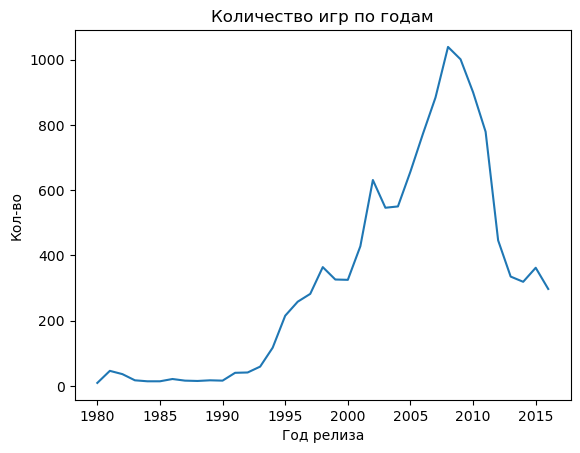

In [23]:
# Построим график зависимости количества игр от года выпуска
games_per_year = (
    games[['name', 'year_of_release']]
        .drop_duplicates()
        .pivot_table(index='year_of_release', values='name', aggfunc='count')
        .sort_values('year_of_release', ascending=False)
)
(
    games_per_year
        .plot(legend=False,title='Количество игр по годам')
        .set(xlabel='Год релиза', ylabel='Кол-во')
)

plt.show()

Из графика можно предположить, что начиная с 1990 года начался рост количества игр,сменившийся резким ростом с 2000 года, с 2002 по 2004 выявлен небольшой "застой", а затем снова резкий скачок до 2008-2009г, где наблюдался пик количества игр, затем наступил спад количества вплоть до 2016г. Рассматривать совсем старые игры нецелесообразно, возьмём последний период в 5-10 лет, т.к. они отражают как взлет, так и падение количества игр.

### Как менялись продажи по платформам.

На этом шаге мы рассмотрим сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
Рассмотрим как менялись продажи по платформам, выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Также проанализируем за какой характерный срок появляются новые и исчезают старые платформы?

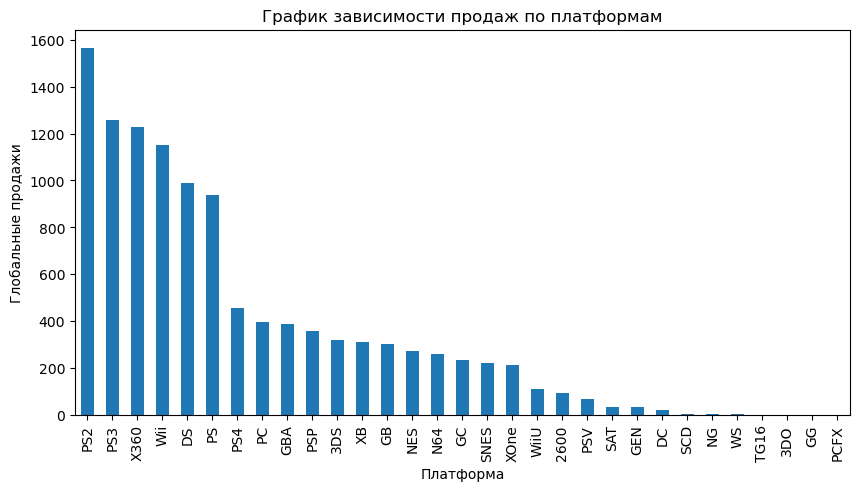

In [62]:
# Построим график зависимости продаж по платформам
total_sales_per_platform = (games.groupby(['platform'],as_index = False)['total_sales'].sum()
                                 .sort_values('total_sales',ascending = False)
                           )
(total_sales_per_platform.plot(kind='bar',x='platform', y='total_sales',figsize=(10, 5),legend=False)
                         .set(xlabel='Платформа', ylabel='Глобальные продажи')
)
plt.title('График зависимости продаж по платформам')
plt.show()

In [25]:
top_6_alltime = total_sales_per_platform['platform'].head(6).tolist()
top_6_alltime

['PS2', 'PS3', 'X360', 'Wii', 'DS', 'PS']

Из данного графика можно выделить несколько топовых платформ с наибольшими суммарными продажами, например, PS2, X360, PS3, Wii, DS, PS. Данные 6 платформ выделяются от всех остальных наибольшими суммарными продажами.

Посмотрим, как менялись продажи по платформам с максимальным количеством продаж, построим распределение по годам.

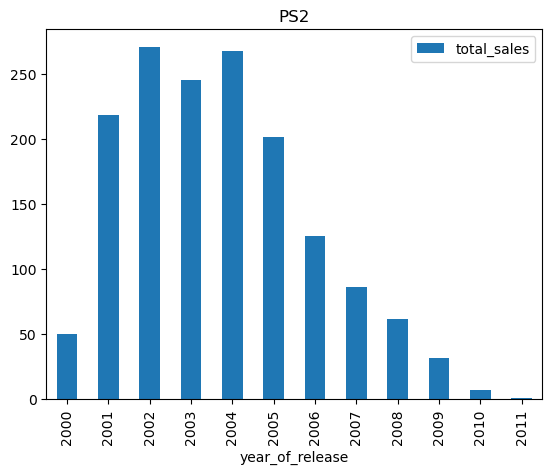

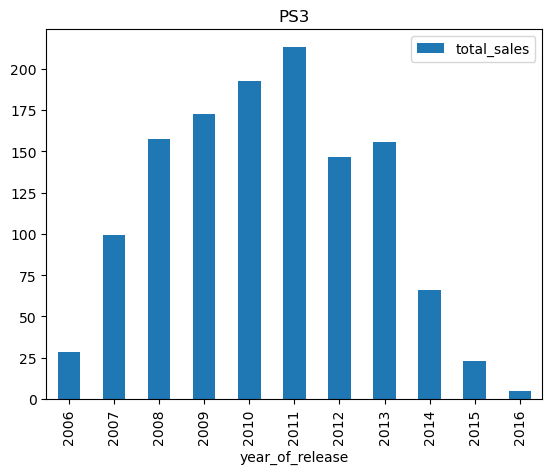

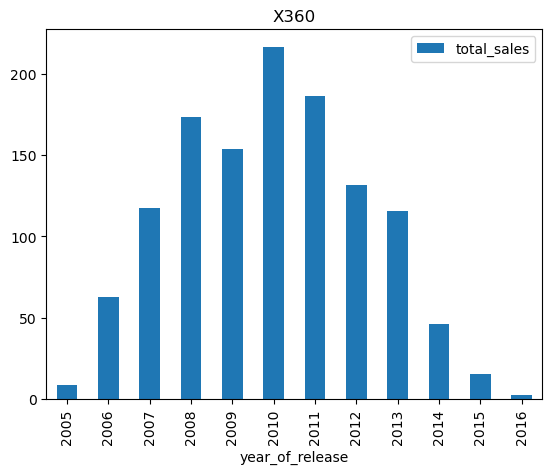

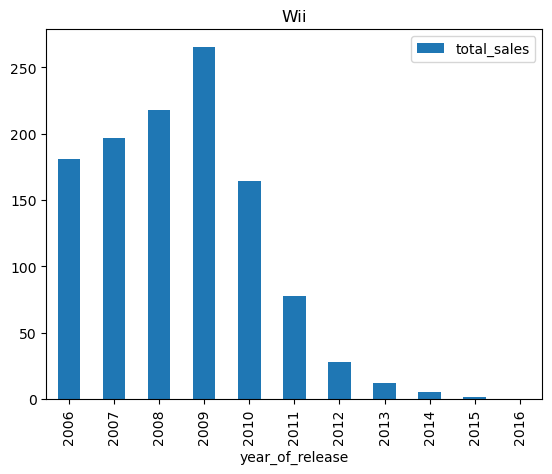

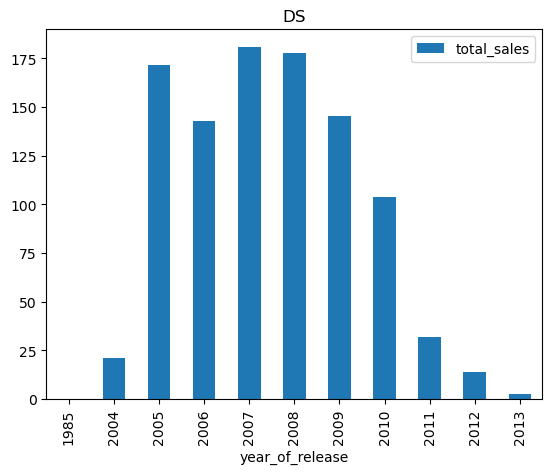

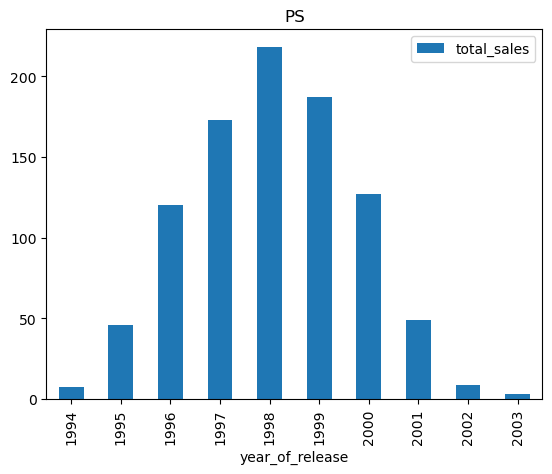

In [26]:
#цикл по top платформам
for platform in top_6_alltime:    
    (games.query('platform == @platform')
     .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar')
     .set_title(platform)
    )

По платформе PS2 пик продаж наблюдался в период 2001-2005гг., затем следует спад, в 2011г. продажи прекратились, в настоящее время платформа не актуальна.

По платформе X360 продажи стартовали с 2005г, пик продаж наблюдался в период 2010-2011гг., затем следует спад. Даже учитывая, что за 2016г. неполные данные, можно сделать вывод, что в настоящее время платформа не актуальна.

По платформе PS3 продажи стартовали с 2006г, пик продаж наблюдался в период 2009-2011гг., затем следует спад. В 2015-2016гг. продажи данной платформы имеют минимальные значения.

По платформе Wii продажи начались в 2006г., очень быстро достигли своего максимума в 2008-2009, затем следует спад, в 2014-2015г. продажи практически прекратились, в настоящее время платформа не актуальна.

По платформе DS продажи начались в 2004г., очень быстро достигли своего максимума в 2005-2008, затем следует спад, в 2013 продажи практически прекратились, в настоящее время платформа не актуальна.

Платформа PS, продажи начались в 1994г., своего максимума достигли в 1998г, затем идет спад продаж, в 2003 продажи практически прекратились, в настоящее время платформа не актуальна.

### За какой характерный срок появляются новые и исчезают старые платформы?

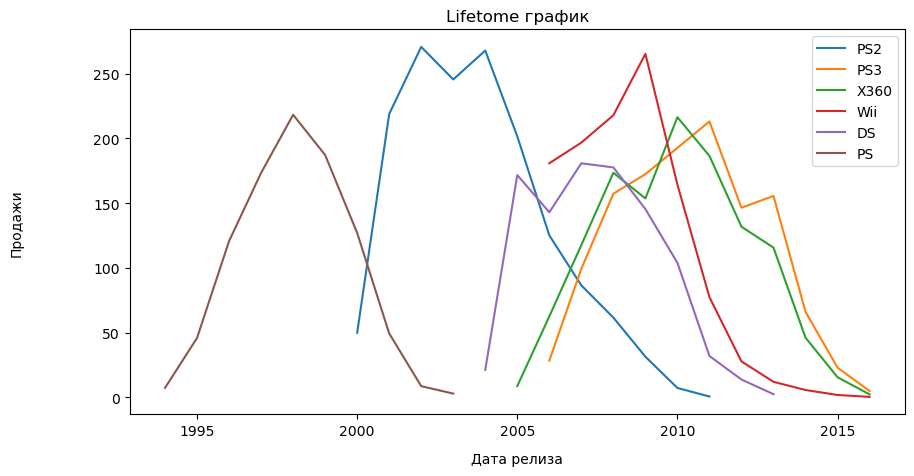

In [63]:
# построим общий график
for name in top_6_alltime:
    games.query('platform == @name and year_of_release != -1 and year_of_release>1985' ).pivot_table(index = 'year_of_release',
                        values = 'total_sales', aggfunc = 'sum').sort_values('year_of_release',
                                                    ascending = False)['total_sales'].plot(figsize = (10, 5), label=name)
   
    plt.xlabel('Дата релиза', labelpad = 10)
    plt.ylabel('Продажи', labelpad = 50)
    plt.title('Lifetome график')
    plt.legend()

По графику видим, что платформа появляется и исчезает в течение примерно 10 лет. Таким образом для нашего прогноза целесообразно рассмотреть период за последние 5 лет, в этот период попадут те платформы, которые набирают популярность, либо находятся на пике продаж.

**Возьмем данные за соответствующий актуальный период - 5 лет.**

In [34]:
# отрезаем старые данные и сохраним данные за 2012, 2013, 2014, 2015, 2016гг. в таблице games_fresh
games_fresh = games.query('year_of_release > 2011').copy()
actual_platforms_search = (games_fresh.groupby(['platform'],as_index = False)['total_sales'].sum()
                                 .sort_values('total_sales',ascending = False)
                           )
actual_platforms_search

,platform,total_sales
4,PS4,455.23
3,PS3,395.65
9,X360,311.06
0,3DS,237.25
10,XOne,210.91
8,WiiU,107.32
2,PC,100.41
6,PSV,60.54
7,Wii,47.29
1,DS,16.08


### Какие платформы лидируют по продажам, растут или падают?

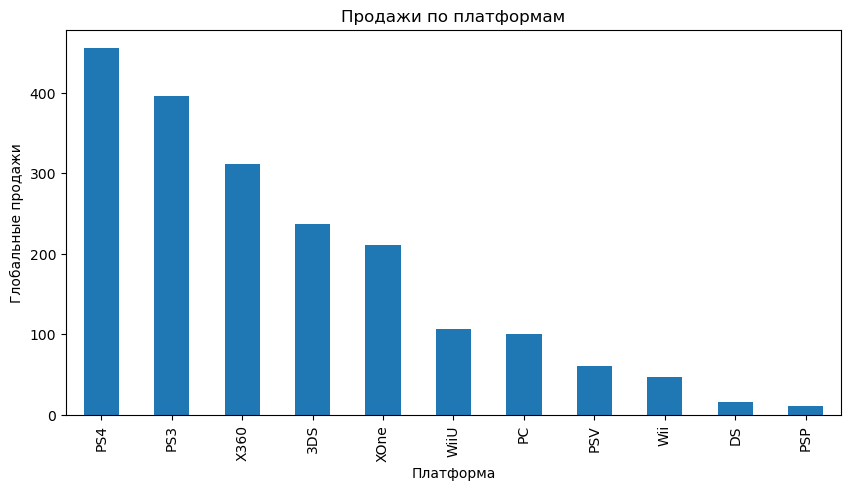

In [64]:
# построим график зависимости продаж от типа платформ за актуальный период 2012-2016 (5 лет)
(actual_platforms_search.plot(kind='bar',x='platform', y='total_sales',figsize=(10, 5),legend=False)
                         .set(xlabel='Платформа', ylabel='Глобальные продажи')
)
plt.title('Продажи по платформам')
plt.show()

In [36]:
top_now = actual_platforms_search['platform'].tolist()
top_now[:5]

['PS4', 'PS3', 'X360', '3DS', 'XOne']

Из данного графика можно сделать вывод, что за актуальный период лидируют по продажам платформы PS4, PS3, X360, 3DS, XOne. Далее построим распределение топовых платформ по годам.

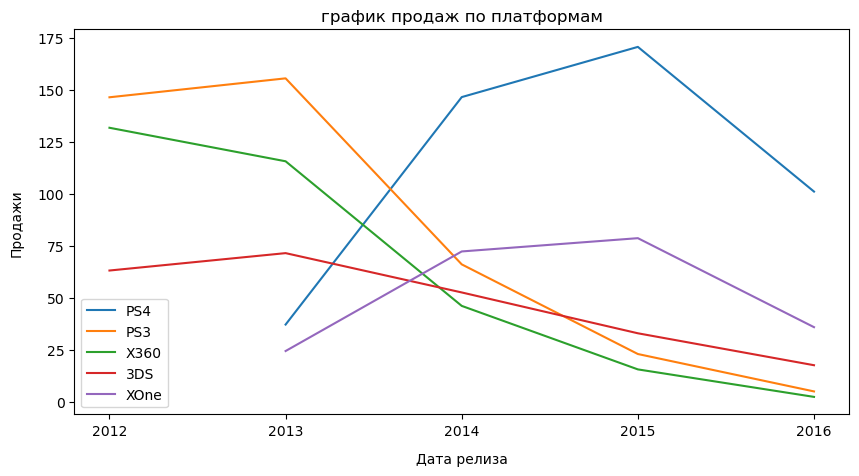

In [65]:
for name in top_now[:5]:
    games_fresh.query('platform == @name').pivot_table(index = 'year_of_release',
                        values = 'total_sales', aggfunc = 'sum').sort_values('year_of_release',
                                                    ascending = False)['total_sales'].plot(figsize=(10, 5), label = name)
    
    plt.xticks(np.arange(2012, 2017, step=1))
    plt.xlabel('Дата релиза', labelpad = 10)
    plt.ylabel('Продажи', labelpad = 10)
    plt.title('график продаж по платформам')
    plt.legend()

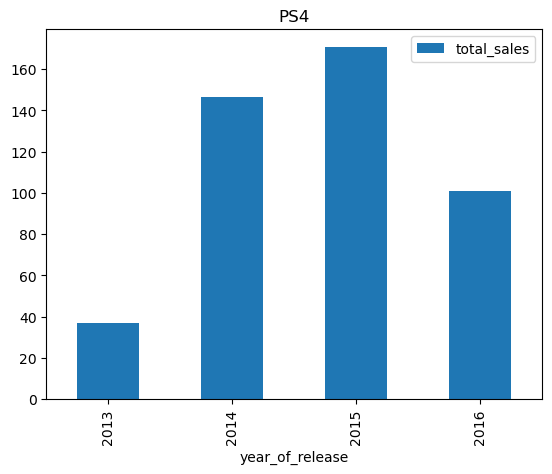

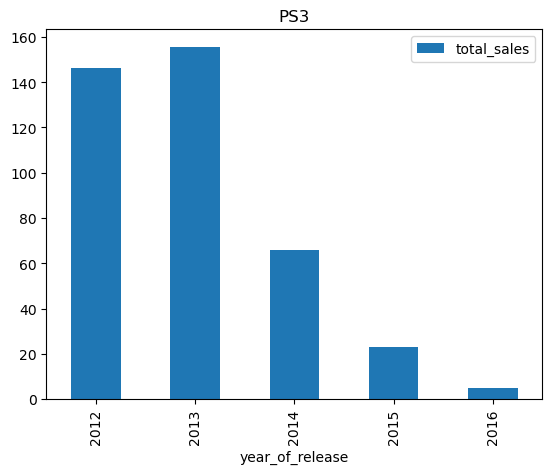

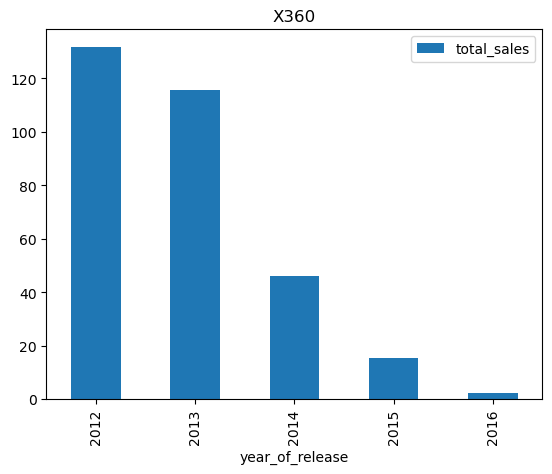

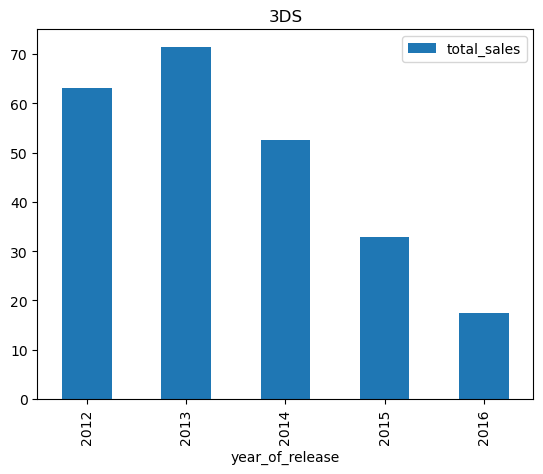

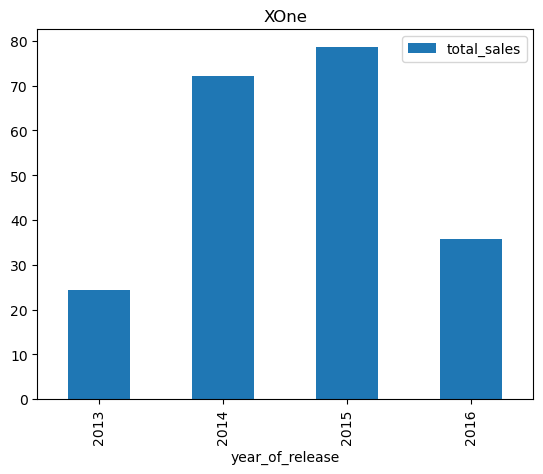

In [38]:
for platform in top_now[:5]:
    (games_fresh.query('platform == @platform')    
    .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
    .plot(kind='bar')
    .set_title(platform)
    ) 

Платформа PS4. Учитывая что данные за 2016г неполные, можно сделать вывод, что по данной платформе продажи находятся на одном уровне, ее стабильно много покупают последние три года. Платформа является актуальной и наиболее прибыльной.

Дла платформы PS3 пик продаж пришелся на 2012 и 2013 годы, затем идет спад, в 2016 продажи минимальны. На смену ей приходит платформа PS4.

По платформе X360 наблюдается пик продаж в 2012 и 2013 годах, спад продаж с 2013г, в 2016 продаж почти нет.

Пик продаж платформы 3DS приходится на 2013 год, затем идет спад продаж до 2016г. Видим что платфома в 2016 еще актуальна и прибыльна.

Пик продаж XOne был в 2014 и 2015, в 2016г спад примерно на 50%. В 2016 платформа актуальна и прибыльна. 

**Какие платформы можно оставить для анализа?**

По результатам анализа количества продаж платформ за актуальный период, при дальнейшей обработке и анализе имеет смысл не учитывать платформы, для которых в 2016 году продаж почти нет, и остановиться на потенциально прибыльных платформах: PS4, 3DS и XOne.

### График «ящик с усами» по глобальным продажам игр в разбивке по платформам.

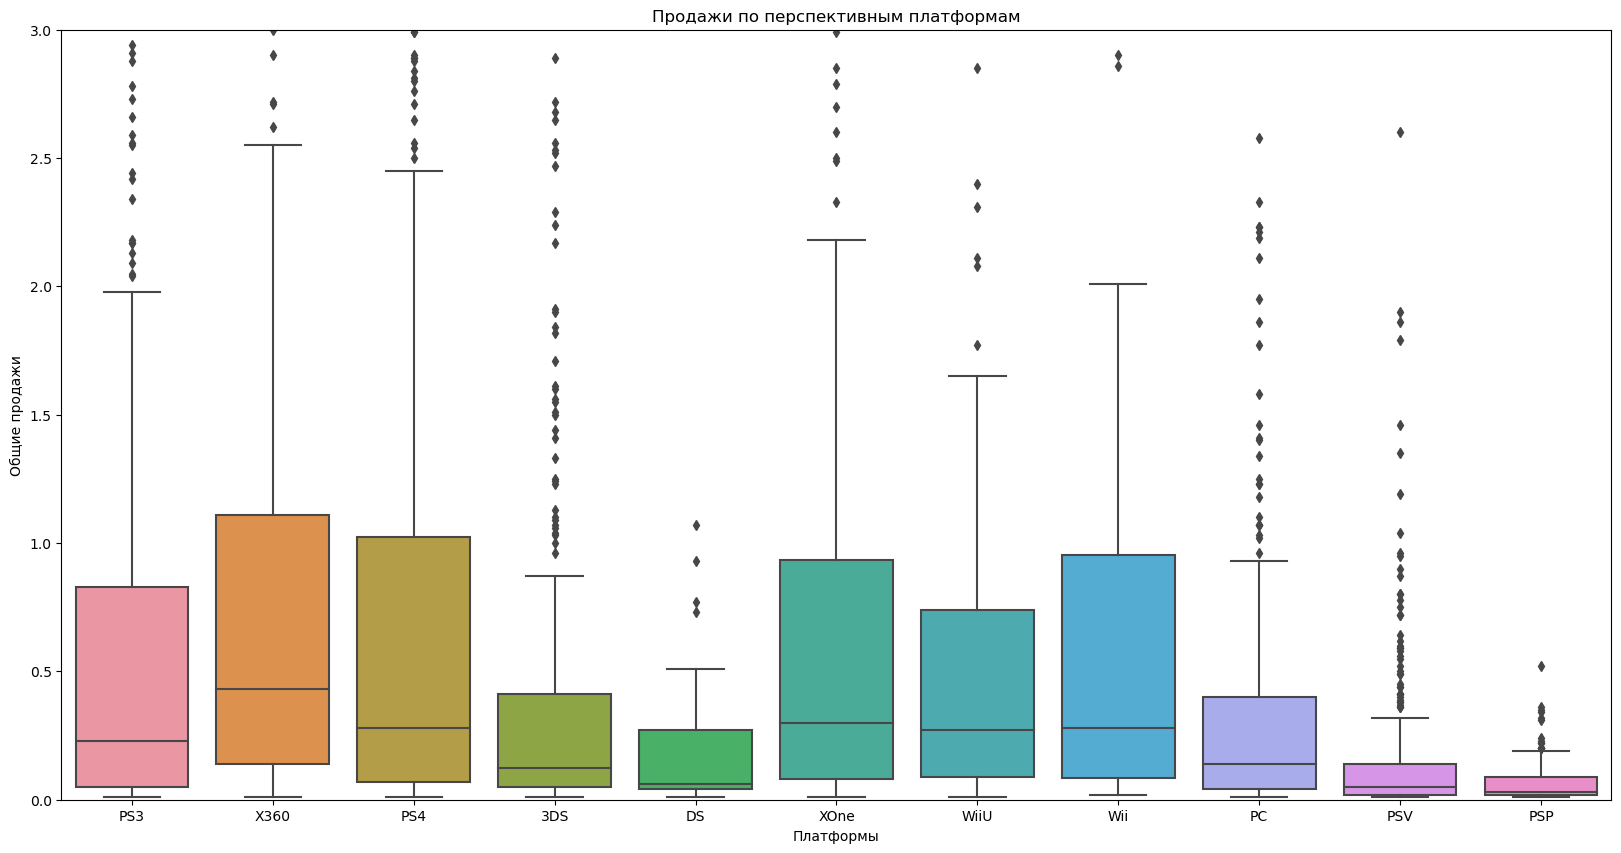

In [43]:
# построим график по глобальным продажам игр в разбивке по платформам
fig = plt.figure(figsize = (20,10))
(sns.boxplot(data = games_fresh, y = 'total_sales', x='platform')
 .set(title = 'Продажи по перспективным платформам', xlabel = 'Платформы', ylabel = 'Общие продажи', ylim=(0, 3))
)
plt.show()

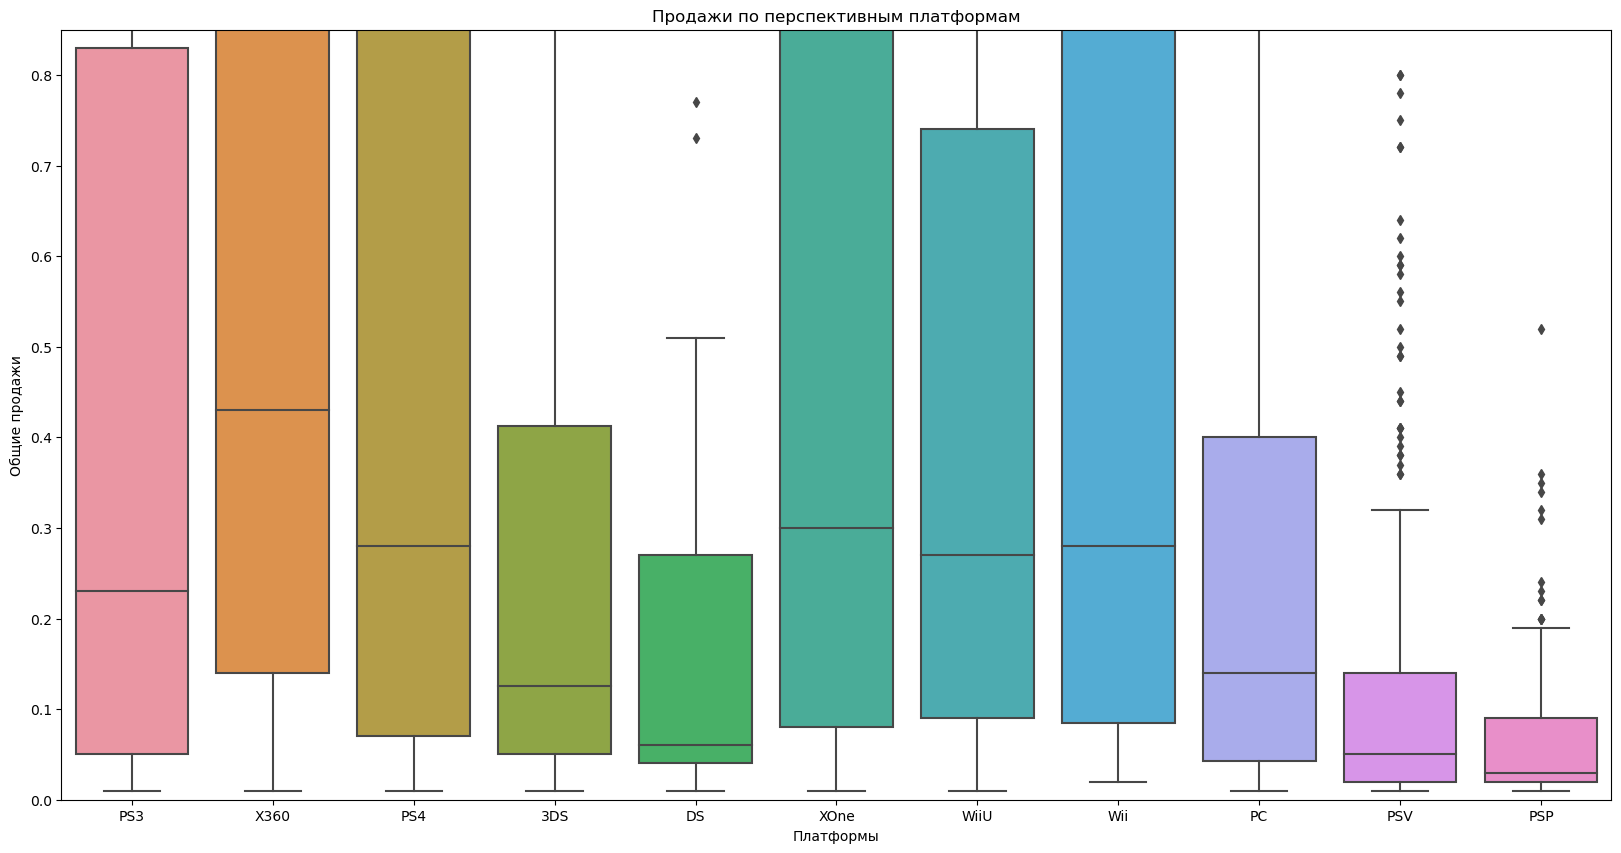

In [44]:
# добавим второй график для наглядности
fig = plt.figure(figsize = (20,10))
(sns.boxplot(data = games_fresh, y = 'total_sales', x='platform')
 .set(title = 'Продажи по перспективным платформам', xlabel = 'Платформы', ylabel = 'Общие продажи', ylim=(0, 0.85))
) 
plt.show()

In [45]:
games_fresh.pivot_table(index = 'platform', values = ['total_sales'],aggfunc = ['var', 'median', 'mean'])

,var,median,mean
,total_sales,total_sales,total_sales
platform,,,
3DS,3.091120,0.125,0.599116
DS,3.037858,0.060,0.518710
PC,0.552414,0.140,0.401640
PS3,4.478174,0.230,0.802535
PS4,5.748634,0.280,1.161301
PSP,0.006420,0.030,0.067110
PSV,0.076190,0.050,0.147299
Wii,2.426112,0.280,0.875741


**Вывод**
Из графика «ящик с усами» видно, что практически по всем платформам существуют выбросы дальше третьих квартилей. У платформ X360, XOne, Wii, PS4 высокие медианные значения продаж (0.43, 0.3, 0.28, 0.28 соответственно), также приблизительно равны среднее арифметическое значение продаж (1.07, 0.85, 0.87, 1,16 соответственно). Из данного анализа следует, что большей популярностью пользуются уже вышеуказанные платформы **X360, XOne, Wii, PS4**.

### Как влияют как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.

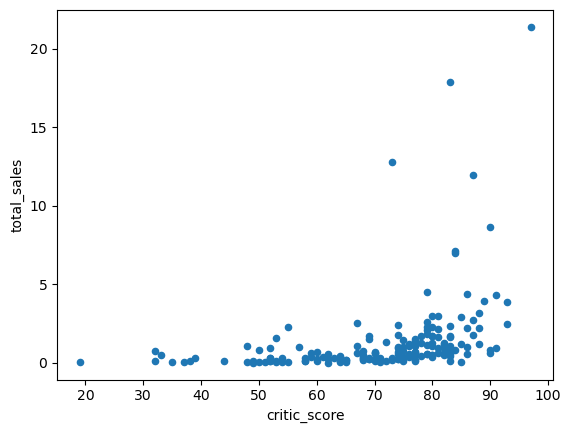

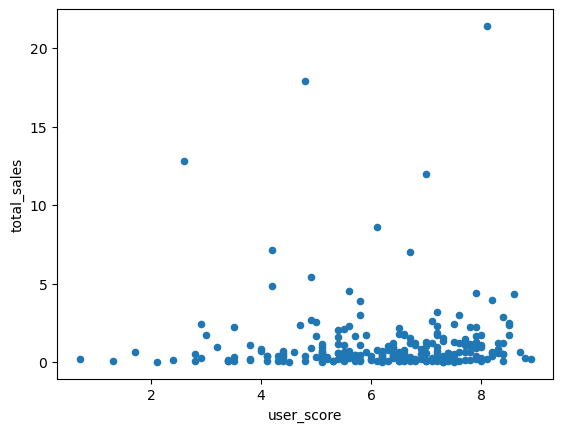

critic_score    0.363721
user_score      0.001630
total_sales     1.000000
Name: total_sales, dtype: float64


In [46]:
# Построим диаграмму рассеяния для платформы X360, исключим значения-заглушки (-1) в отзывах пользователей и критиков
games_platform = games_fresh.query('platform == "X360"')
games_platform[games_platform['critic_score'] != -1].plot(kind='scatter', x='critic_score', y='total_sales')
games_platform[games_platform['user_score'] != -1].plot(kind='scatter', x='user_score', y='total_sales')
plt.show()
# Расчет коэффициента корреляции
print(games_platform[(games_platform['critic_score'] != -1) & (games_platform['user_score'] != -1)][['critic_score', 'user_score', 'total_sales']].corr()['total_sales'])


Оценки критиков демонстрируют прямую, средне-слабую корреляцию (коэффициент 0,36) с "цифрами" продаж. Оценки пользователей корреляции с продажами не имеют (коэффициент 0,002).

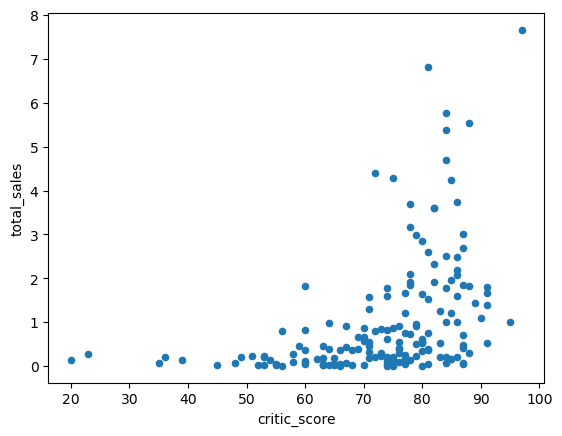

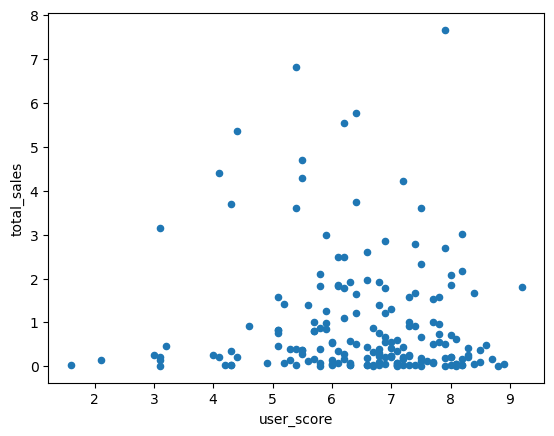

critic_score    0.411427
user_score     -0.091516
total_sales     1.000000
Name: total_sales, dtype: float64


In [47]:
# Построим диаграмму рассеяния для платформы XOne, исключим значения-заглушки (-1) в отзывах пользователей и критиков
games_platform = games_fresh.query('platform == "XOne"')
games_platform[games_platform['critic_score'] != -1].plot(kind='scatter', x='critic_score', y='total_sales')
games_platform[games_platform['user_score'] != -1].plot(kind='scatter', x='user_score', y='total_sales')
plt.show()
# Расчет коэффициента корреляции
print(games_platform[(games_platform['critic_score'] != -1) & (games_platform['user_score'] != -1)][['critic_score', 'user_score', 'total_sales']].corr()['total_sales'])


Оценки критиков демонстрируют прямую, средне-слабую корреляцию (коэффициент 0,41) с "цифрами" продаж. Оценки пользователей корреляции с продажами не имеют (коэффициент -0,09).

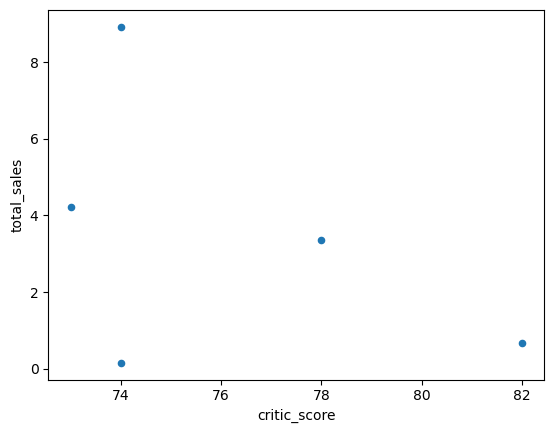

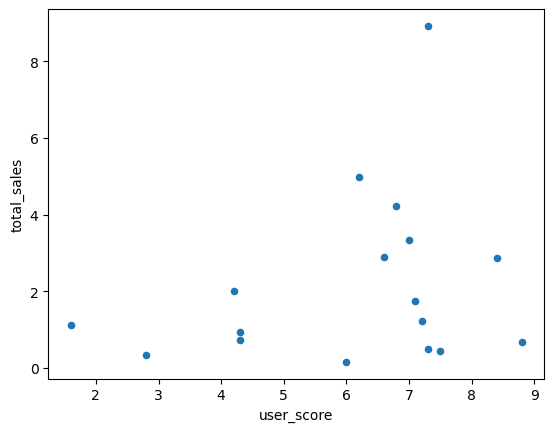

critic_score   -0.445472
user_score     -0.015555
total_sales     1.000000
Name: total_sales, dtype: float64


In [48]:
# Построим диаграмму рассеяния для платформы Wii, исключим значения-заглушки (-1) в отзывах пользователей и критиков
games_platform = games_fresh.query('platform == "Wii"')
games_platform[games_platform['critic_score'] != -1].plot(kind='scatter', x='critic_score', y='total_sales')
games_platform[games_platform['user_score'] != -1].plot(kind='scatter', x='user_score', y='total_sales')
plt.show()
# Расчет коэффициента корреляции
print(games_platform[(games_platform['critic_score'] != -1) & (games_platform['user_score'] != -1)][['critic_score', 'user_score', 'total_sales']].corr()['total_sales'])


Оценки критиков демонстрируют обратную, средне-слабую корреляцию (коэффициент 0,45) с "цифрами" продаж. Оценки пользователей корреляции с продажами не имеют (коэффициент -0,02).

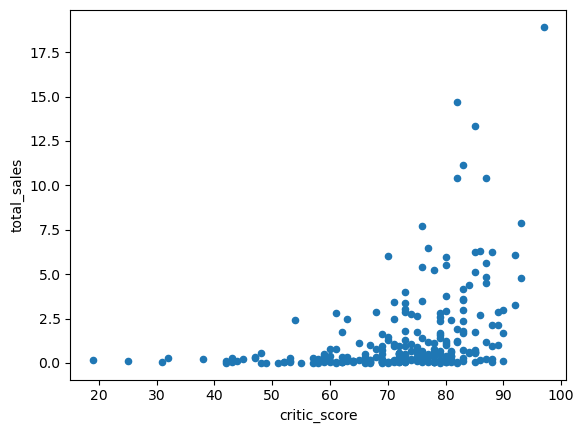

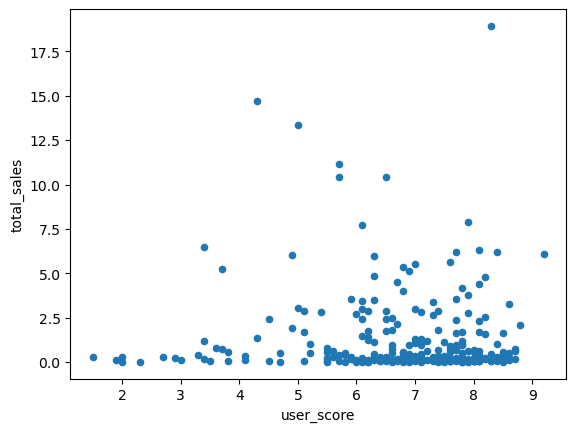

critic_score    0.389265
user_score     -0.040030
total_sales     1.000000
Name: total_sales, dtype: float64


In [66]:
# Построим диаграмму рассеяния для платформы PS4, исключим значения-заглушки (-1) в отзывах пользователей и критиков
games_platform = games_fresh.query('platform == "PS4"')
games_platform[games_platform['critic_score'] != -1].plot(kind='scatter', x='critic_score', y='total_sales')
games_platform[games_platform['user_score'] != -1].plot(kind='scatter', x='user_score', y='total_sales')
plt.show()
# Расчет коэффициента корреляции
print(games_platform[(games_platform['critic_score'] != -1) & (games_platform['user_score'] != -1)][['critic_score', 'user_score', 'total_sales']].corr()['total_sales'])


Оценки критиков демонстрируют прямую, средне-слабую корреляцию (коэффициент 0,39) с "цифрами" продаж. Оценки пользователей корреляции с продажами не имеют (коэффициент -0,04).

**Вывод:**

    -Из построенных выше диаграмм рассеяния и расчета коэффициента корреляции по каждой платформе между отзывами и продажами видно: 
     
    -оценки критиков демонстрируют прямую, средне-слабую корреляцию с "цифрами" продаж. 
    
    -Оценки пользователей корреляции с продажами не имеют.

### Общее распределение игр по жанрам. Выделяются ли жанры с высокими и низкими продажами?

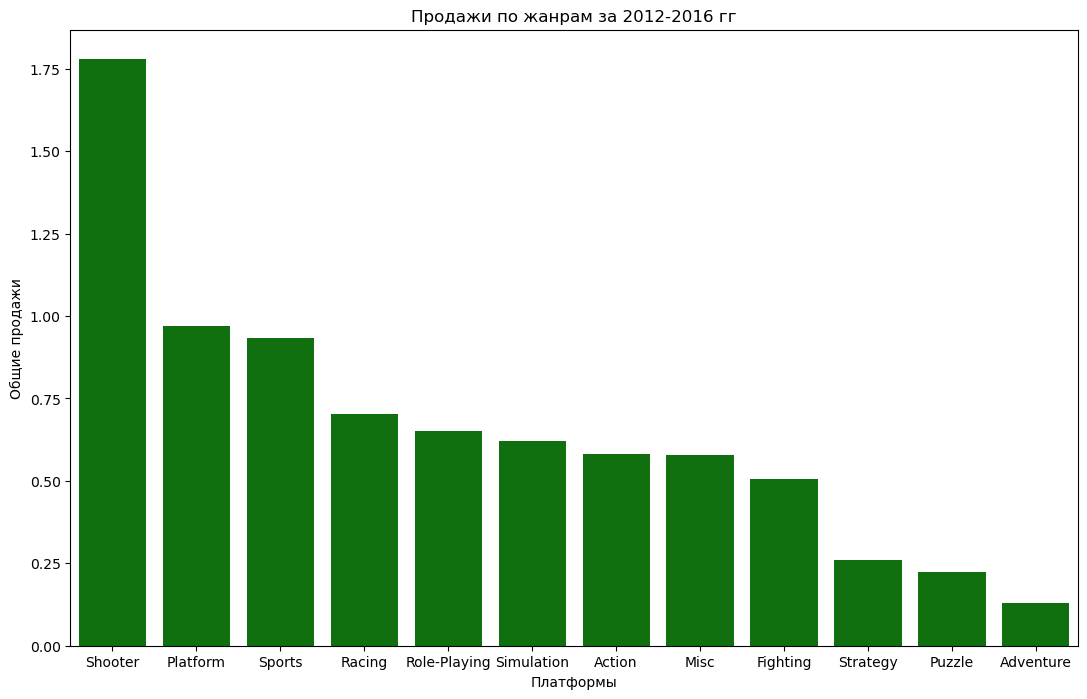

In [50]:
# Построим график распределения продаж по жанрам игр
plt.figure(figsize=(13, 8))
platform_sales_fresh = games_fresh.pivot_table(index='genre', values='total_sales', aggfunc='mean').sort_values('total_sales', ascending=False)
(sns.barplot(data = platform_sales_fresh, x = platform_sales_fresh.index, y = 'total_sales', color = 'green')
    .set(title = 'Продажи по жанрам за 2012-2016 гг', xlabel = 'Платформы', ylabel = 'Общие продажи'))
plt.show()

**Вывод:**

При анализе медианных значений продаж, явным лидером является жанр Shooter. Первый график я строил по суммарным значениям и лидером был жанр Action, это было моей ошибкой, т.к. мире игр жанра Экшн выпускается почти в 2 раза больше других и в нем есть много игр с плохими продажами. Жанр Action в итоге берет не качеством а количеством, а для магазина важно иметь качественный товар, приносящий хорошую прибыль, поэтому руководству стоит долложить о перспективности жанра Shooter (этот вывод войдет в общий итог проекта)

**Вывод по шагу 3**

В данном разделе мы выявили лидирующие платформы: X360, XOne, Wii, PS4.

Наиболее прибыльнй жанр Shooter, наименее прибыльный Adventure.

Проверили вляение оценок на продажи и выяснили:

оценки критиков демонстрируют прямую, средне-слабую корреляцию с "цифрами" продаж, а оценки пользователей корреляции с продажами не имеют.

Платформа появляется и исчезает в течение примерно 10 лет

## Шаг: Составим портрет пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP):
Самые популярные платформы (топ-5). Опишем различия в долях продаж.
Самые популярные жанры (топ-5). Поясните разницу.
Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [51]:
regions_list = ['na_sales','eu_sales','jp_sales'] # список регионов
print(games_fresh[regions_list].sum())

na_sales    590.97
eu_sales    506.82
jp_sales    192.58
dtype: float64


Cуммарный объём продаж в Японии более чем в 2.5 раза меньше Европы и Америки.

### Самые популярные платформы (топ-5)

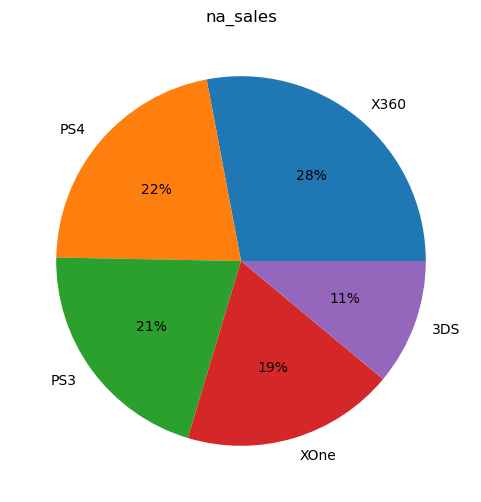

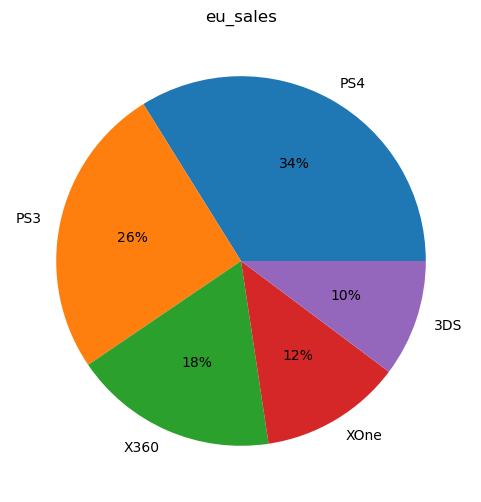

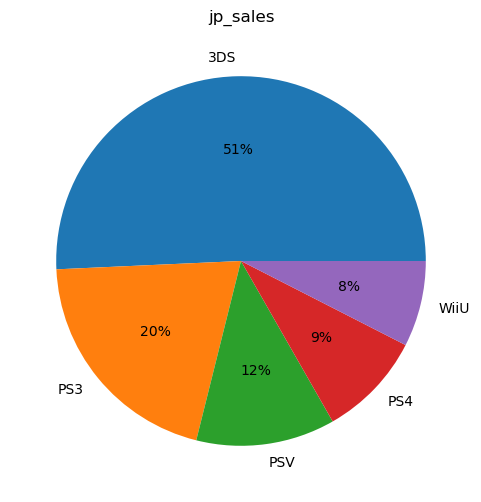

In [52]:
for region in regions_list:
    (games_fresh.pivot_table(index='platform', values=region, aggfunc='sum')
                .sort_values(region, ascending=False).head(5)
                .plot(kind='pie', y=region, autopct='%1.0f%%', figsize=(6, 6), legend=False, title = region)
                .set(ylabel='')
    )
    plt.show()

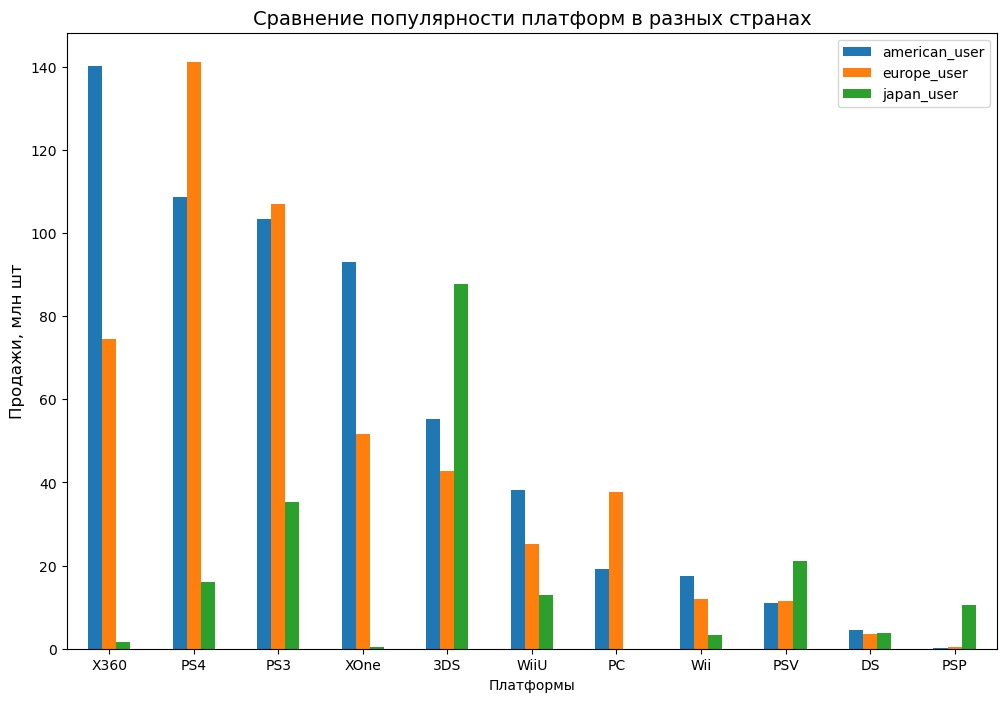

In [53]:
# сумма проданных копий для Северной Америки по платформам
na_platf = games_fresh.groupby(['platform'])['na_sales'].agg(['sum'])
# сумма проданных копий для Европы по платформам
eu_platf = games_fresh.groupby(['platform'])['eu_sales'].agg(['sum'])
# сумма проданных копий для Японии по платформам
jp_platf = games_fresh.groupby(['platform'])['jp_sales'].agg(['sum'])
# объединяем Series
users_platf = pd.concat([na_platf, eu_platf, jp_platf], axis=1).reset_index()
users_platf.columns = ['platform', 'american_user', 'europe_user', 'japan_user']
users_platf = users_platf.sort_values(by='american_user', ascending=False)
# строим bar plot
users_platf.plot.bar(x="platform", rot=0, figsize =(12, 8))
plt.title('Сравнение популярности платформ в разных странах', fontsize=14)
plt.xlabel('Платформы', fontsize=10)
plt.ylabel('Продажи, млн шт',fontsize=12)
plt.show()

Из графика видно:

* для пользователей Америки самыми популярными платформами являются X360, PS4, PS3, XOne ,3DS . 
* для пользователей Европы самыми популярными платформами являются PS4 (более 140 млн. шт) и PS3 (более 100 млн. шт), X360 (более 70 млн), XOne( более 50 млн), 3DS (более 40 млн). 
* для пользователей Японии самыми популярными платформами являются 3DS , PS3 , PSV , PS4 , WiU). 

В Японии более 50% рынка захватила 3DS.
В Европе лидирует PS4.
В Америке лидирует X360.

### Самые популярные жанры (топ-5)

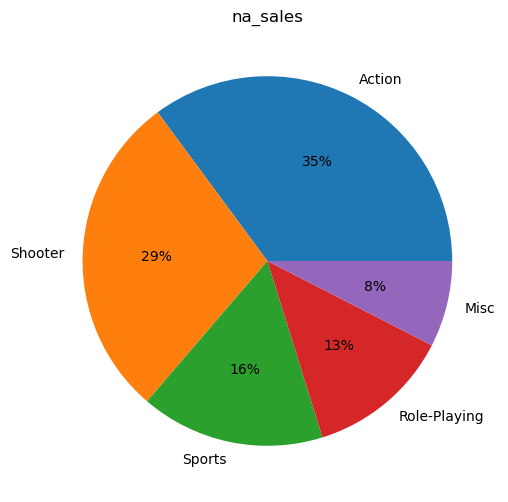

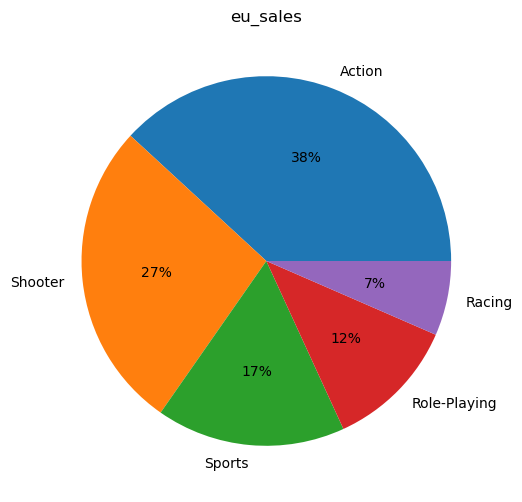

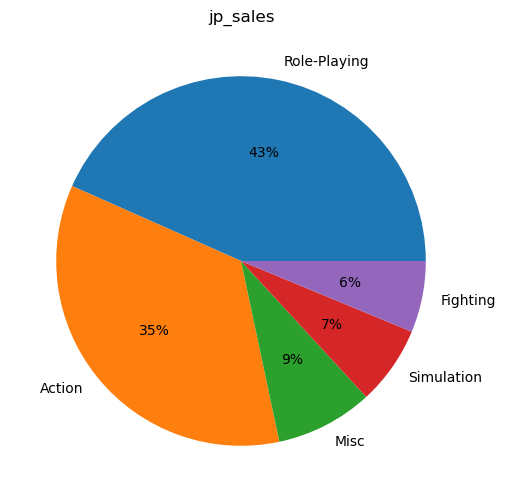

In [54]:
for region in regions_list:
    (games_fresh.pivot_table(index='genre', values=region, aggfunc='sum')
                .sort_values(region, ascending=False).head(5)
                .plot(kind='pie', y=region, autopct='%1.0f%%', figsize=(6, 6), legend=False, title = region)
                .set(ylabel='')
    )
    plt.show()

Из графика видно: 
В Европе и Америке популярны жанры Action,Shooter и Sports.
Япония любит РПГ и Action.

### Определим влияние рейтинга ESRB на продажи в отдельном регионе.

ESRB рейтинг расшифровка:
  * «E» («Everyone») — «Для всех»
  * «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
  * «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет
  * «M» («Mature») — «Для взрослых» - Материалы игры не подходят для лиц младше 17 лет.

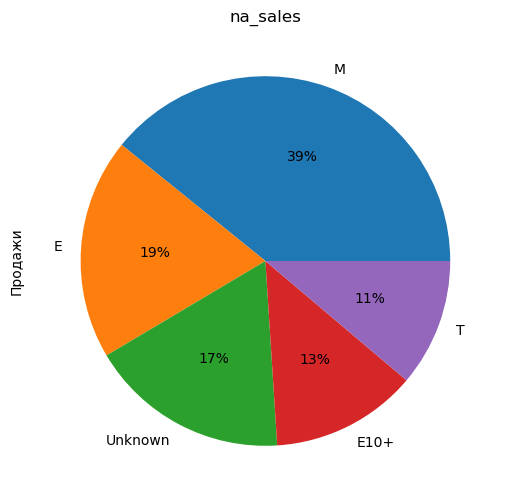

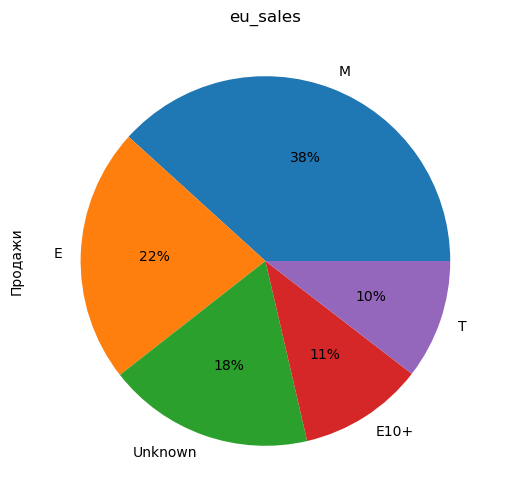

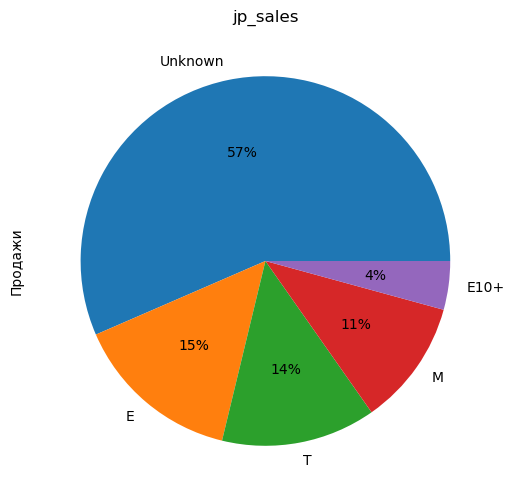

In [55]:
for region in regions_list:
    (games_fresh.pivot_table(index='rating', values=region, aggfunc='sum')
                .sort_values(region, ascending=False).head(5)
                .plot(kind='pie', y=region, autopct='%1.0f%%', figsize=(6, 6), legend=False, title = region)
                .set(ylabel='Продажи')
    )
    plt.show()

Снова похожая ситуация для Европы и Америки - хорошо продаются игры с рейтингом для взрослых (М) и для всех (Е).
В Японии много продаж по играм с неизвестным рейтингом и рейтингом для всех (Е).

**Вывод по шагу 4:**

В данном разделе проведены исследования для определения портрета пользователя каждого региона. Можно отметить, что предпочтения пользователей Америки и Европы во многом схожи, жанры Action,Shooter и Sports, игры с рейтингом для взрослых и для всех.
В Европе лидирует платформа PS4, в Америке Х360.
В связи с многочисленностью пользователей в данных регионах бизнесу повышенное внимание в первую очередь стоит обратить на указанные платформы и жанры игр. 

Предпочтения пользователей из Японии существенно отличаются, самой популярной платформой являются 3DS, любимые жанры - Role-Playing и Action и игры с неизвестным рейтингом и рейтингом для всех.

## Шаг: Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Альтернативная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC различаются.

In [56]:
# удаляем значения-заглушки
games_fresh[games_fresh['user_score'] != -1]
xone = games_fresh.query("platform == 'XOne' and user_score != -1")
pc = games_fresh.query("platform == 'PC' and user_score != -1")

print("Дисперсия выборки XOne",np.var(xone['user_score']))
print("Дисперсия выборки pc",np.var(pc['user_score']))

results = st.ttest_ind(
    xone['user_score'],
    pc['user_score'],
    equal_var=False  # Welch’s t-test, который не предполагает равенство дисперсий
)
alpha = 0.05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Дисперсия выборки XOne 1.8965188383045533
Дисперсия выборки pc 2.7569952398906565
p-значение: 0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


In [57]:
xone['user_score'].mean()

6.52142857142857

In [58]:
pc['user_score'].mean()

6.428640776699027

**Вывод:**

**p-значение: 0.5926118514134859**

нет оснований утверждать, что средние пользовательские рейтинги платформ Xbox One и PC значимо различаются. 

Принимаем нулевую гипотезу, p-значение больше значения alpha, что дает основание принять предположение об отсутствии различий между средними пользовательскими рейтингами платформ Xbox One и PC

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Н0: Средние пользовательские рейтинги жанров Action и Sports одинаковые.

Н1: Средние пользовательские рейтинги жанров Action и Sports различаются.

In [59]:
action = games_fresh.query("genre == 'Action' and user_score != -1")
sport = games_fresh.query("genre == 'Sports' and user_score != -1")

print("Дисперсия выборки action",np.var(action['user_score']))
print("Дисперсия выборки sport",np.var(sport['user_score']))
results = st.ttest_ind(
    action['user_score'],
    sport['user_score'],
    equal_var=False,  # Welch’s t-test, который не предполагает равенство дисперсий
)
alpha = 0.05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Дисперсия выборки action 1.8854720340439228
Дисперсия выборки sport 3.007388297172914
p-значение: 4.24307776572644e-20
Отвергаем нулевую гипотезу


In [60]:
action['user_score'].mean() 

6.825047801147237

In [61]:
sport['user_score'].mean()

5.455897435897437

**Вывод:**

**p-значение: 3.551295319559386e-20**

Принимаем альтернативную гипотезу, p-значение достаточно мало, что дает основание отвергнуть предположение об отсутствии различий между cредними пользовательскими рейтингами жанров Action и Sports.

**Вывод по шагу 5:**
На данном шаге мы проверили 2 гипотезы
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
Рейтинги платформ Xbox One и PC одинаковые и наша гипотеза подтвердилась.
* Средние пользовательские рейтинги жанров Action  и Sports разные.
Средние пользовательские рейтинги жанров Action и Sports действительно различаются и наша альтернативная гипотеза подтвердилась.



## Шаг: Общий вывод

В ходе выполнения данного проекта: 
* проведен обзор данных и выполнена предобработка данных, выявлены недостатки в данных, были обработаны пропуски, в некоторых случаях строки были удалены за ненадобностью, в некоторых пропуски были заменены на значение заглушку (-1), 
* были расчитаны суммарные продажи по регионам и записаны в отдельный столбец 'total_sales'. 
* проведен исследовательский анализ данных: Построен график количества игр выпускавшихся в разные годы. Построен график как менялись продажи по платформам. Указаны платформы с наибольшими продажами и распределение по годам. 
* по итогам анализа данных, выбран соответствующий актуальный период. Построен график зависимости продаж от типа платформ за актуальный период. 
* построен график «ящик с усами» по продажам игр в разбивке по платформам. 
* проведен анализ влияния на продажи отзывов пользователей и критиков. 
* построена диаграмма рассеяния и расчитан коэффициент корреляции между отзывами и продажами
* проведена проверка гипотез по проверке разницы рейтингов между платформами и жанрами

**Вывод по шагу 6:**

Передо мной, как аналитиком в данном проекте стояла задача помочь прогнозировать интернет-магазину «Стримчик» рекламную компанию на 2017 год по данным за предыдущие годы.

Хочу отметить, что в целом рынок по всем платформам падает (по данным анализа падание продолжается с 2010 года) в связи с ростом онлайн игр и игр для мобильных.

Рекламные компании нужно разделить на 3 части, в зависимости от региона.
Большую часть рекламных средств вкладываем в рынок Европы и Америки, они в 2,5 раза больше чем рынок Японии
Рекламную компанию Америки и Европы можно при необходимости объединить, т.к. предпочтения очень похожи.
Платформы появляются и умирают в течение 10 лет, поэтому стратегия применима лишь к 2017 году, в 2018 и позднее могут смениться лидеры и актуальные платформы.

* 1.Регион продаж Америка:
топовые платформы Х360 , топовый жанр Shooter, рейтинг игры для взрослых и для всех имеют большие продажи.
В файле данных стоит рейтинг американского рейтингово агетства, поэтому данные о рейтинге наиболее приближены к реальности продаж в регионе.
* 2.Регион продаж Европа
топовые платформы PS4 , топовый жанр Shooter, рейтинг игры для взрослых и для всех имеют большие продажи.
Следует иметь ввиду что в файле данных проставлена американская оценка, а в Европе свой рейтинг Pan European Game Information (PEGI). Для данного региона неплохо бы провести дополнительное исследование с данными по рейтингу игр (PEGI)
* 3.Регион продаж Япония
В этотм регионе используется своя система рейтинга игр Computer Entertainment Rating Organization (CERO), отличная от Европы и Амерки.
 Япония – отдельный рынок с уклоном в портативные консоли и ролевые игры. Объём продаж в этой стране в 2.5 раза меньше показаталей Европы и Америки. Топовые платформы 3DS , топовый жанр RPG и Action, рейтинг неизвестный и рейтинг для всех имеют большие продажи. Для данного региона неплохо бы провести дополнительное исследование с данными по рейтингу игр (CERO)
 
 Рекламная компания будет неполной, если мы сосредоточимся только на 1 платформе для каждого региолна, поэтому можно будет "разбавить" компанию играми для других платформ с большими продажами, это PS4, X360, Wii, DS, PS.
